In [2]:
#Importing the required libraries
import tensorflow as tf
import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import cifar10
cifar10.data_path = "data/CIFAR-10/"
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [6]:
class_names = cifar10.load_class_names()
class_names

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()
print("Train samples:", images_train.shape, cls_train.shape)
print("Test samples:", images_test.shape, cls_test.shape)

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch
Train samples: (50000, 32, 32, 3) (50000,)
Test samples: (10000, 32, 32, 3) (10000,)


In [12]:
images_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [13]:
cls_train[:5]

array([6, 9, 9, 4, 1])

In [18]:
x_train=images_train
x_test=images_test
y_train=cls_train
y_test=cls_test

In [19]:
class_names[9]

'truck'

In [20]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

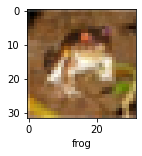

In [21]:
plot_sample(images_train,y_train,0)

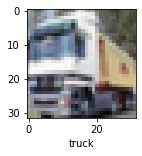

In [22]:
plot_sample(x_train,y_train,1)

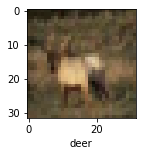

In [23]:
plot_sample(x_train,y_train,3)

In [24]:
#Normalizing data
#Whenever you have an image, you want to divide each pixel value by 255 to normalize it to 0-1 range

x_train[0]/255

array([[[0.00090734, 0.00095348, 0.00096886],
        [0.00066128, 0.00070742, 0.00069204],
        [0.00076894, 0.00073818, 0.00066128],
        ...,
        [0.00242983, 0.00202999, 0.0016609 ],
        [0.00233756, 0.00192234, 0.00156863],
        [0.00227605, 0.00190696, 0.00158401]],

       [[0.00024606, 0.00030757, 0.00030757],
        [0.        , 0.        , 0.        ],
        [0.00027682, 0.00012303, 0.        ],
        ...,
        [0.00189158, 0.00135333, 0.00084583],
        [0.00183007, 0.00127643, 0.00076894],
        [0.0018762 , 0.00133795, 0.00087659]],

       [[0.00038447, 0.00036909, 0.00032295],
        [0.00024606, 0.00010765, 0.        ],
        [0.00075356, 0.00041522, 0.00012303],
        ...,
        [0.00181469, 0.00129181, 0.00076894],
        [0.00184544, 0.00129181, 0.00076894],
        [0.00167628, 0.00112265, 0.00064591]],

       ...,

       [[0.00319877, 0.00261438, 0.00147636],
        [0.00309112, 0.00235294, 0.00052288],
        [0.00304498, 0

In [25]:
x_train=x_train/255
x_test=x_test/255

In [26]:
#Building a simple artificial neural network 

ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)), #I/P layer is a flattend layer
    layers.Dense(3000,activation='relu'), #Hidden layer with 3000 neurons
    layers.Dense(1000,activation='relu'), #Hidden layer with 1000 neurons
    layers.Dense(10,activation='sigmoid') #O/P layer with 10 classes
])

# y is a value here and not one hot encoded and so we use sparse_categorical_crossentropy. Had y been a one-hot
# encoded vector we would have used categorical_crossentropy
ann.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,epochs=10)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
50000/50000 [==============================] - 32s 644us/sample - loss: 2.3019 - acc: 0.1280
Epoch 2/10
50000/50000 [==============================] - 31s 626us/sample - loss: 2.3015 - acc: 0.1289
Epoch 3/10
50000/50000 [==============================] - 33s 657us/sample - loss: 2.3013 - acc: 0.1405
Epoch 4/10
50000/50000 [==============================] - 32s 642us/sample - loss: 2.3011 - acc: 0.1468
Epoch 5/10
50000/50000 [==============================] - 31s 629us/sample - loss: 2.3009 - acc: 0.1494
Epoch 6/10
50000/50000 [==============================] - 32s 643us/sample - loss: 2.3007 - acc: 0.1510
Epoch 7/10
50000/50000 [==============================] - 32s 640us/sample - loss: 2.3005 - acc: 0.1597
Epoch 8/10
50000/50000 [==============================] - 32

In [27]:
ann.evaluate(x_test,y_test) #We get an accuracy of 19.87% using artifical neural network

10000/10000 [==============================] - 2s 179us/sample - loss: 2.2994 - acc: 0.1987


[2.299422215652466, 0.1987]

In [29]:
#As we can see from above Artifical Neural Network performs bad with 10 epochs

#Building a classification report for the same
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test,y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.33      0.48      0.39      1000
           1       0.34      0.14      0.20      1000
           2       0.50      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.16      0.00      0.01      1000
           5       0.14      0.76      0.23      1000
           6       0.25      0.00      0.00      1000
           7       0.24      0.00      0.01      1000
           8       0.00      0.00      0.00      1000
           9       0.24      0.59      0.34      1000

    accuracy                           0.20     10000
   macro avg       0.22      0.20      0.12     10000
weighted avg       0.22      0.20      0.12     10000



In [30]:
#To improve the performance, we now use convolutional neural network (CNN)

cnn=models.Sequential([
    
    #CNN layer 1
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    #Maxpooling layer 1
    layers.MaxPooling2D((2,2)),
    
    #CNN layer 2
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    #Maxpooling layer 2
    layers.MaxPooling2D((2,2)),
    
    #Dense
    layers.Flatten(),
    layers.Dense(64,activation='relu'), 
    layers.Dense(10,activation='softmax') 
    ])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
cnn.fit(x_train,y_train,epochs=100)

Epoch 1/100
50000/50000 [==============================] - 21s 428us/sample - loss: 0.9130 - acc: 0.6793
Epoch 2/100
50000/50000 [==============================] - 22s 437us/sample - loss: 0.9117 - acc: 0.6806
Epoch 3/100
50000/50000 [==============================] - 21s 419us/sample - loss: 0.9068 - acc: 0.6813
Epoch 4/100
50000/50000 [==============================] - 21s 428us/sample - loss: 0.9077 - acc: 0.6810
Epoch 5/100
50000/50000 [==============================] - 21s 416us/sample - loss: 0.9021 - acc: 0.6836
Epoch 6/100
50000/50000 [==============================] - 21s 416us/sample - loss: 0.9033 - acc: 0.6823
Epoch 7/100
50000/50000 [==============================] - 21s 417us/sample - loss: 0.9039 - acc: 0.6838
Epoch 8/100
50000/50000 [==============================] - 21s 420us/sample - loss: 0.8994 - acc: 0.6831
Epoch 9/100
50000/50000 [==============================] - 21s 420us/sample - loss: 0.8992 - acc: 0.6871
Epoch 10/100
50000/50000 [=============================

50000/50000 [==============================] - 21s 417us/sample - loss: 0.8213 - acc: 0.7100
Epoch 79/100
50000/50000 [==============================] - 21s 417us/sample - loss: 0.8187 - acc: 0.7117
Epoch 80/100
50000/50000 [==============================] - 21s 419us/sample - loss: 0.8188 - acc: 0.7109
Epoch 81/100
50000/50000 [==============================] - 21s 426us/sample - loss: 0.8180 - acc: 0.7115
Epoch 82/100
50000/50000 [==============================] - 22s 434us/sample - loss: 0.8186 - acc: 0.7117
Epoch 83/100
50000/50000 [==============================] - 22s 434us/sample - loss: 0.8168 - acc: 0.7131
Epoch 84/100
50000/50000 [==============================] - 22s 433us/sample - loss: 0.8168 - acc: 0.7116
Epoch 85/100
50000/50000 [==============================] - 22s 431us/sample - loss: 0.8154 - acc: 0.7126
Epoch 86/100
50000/50000 [==============================] - 22s 432us/sample - loss: 0.8159 - acc: 0.7137
Epoch 87/100
50000/50000 [==============================] -

In [45]:
cnn.evaluate(x_test,y_test) #We get an accuracy of 62.30% using CNN

10000/10000 [==============================] - 1s 97us/sample - loss: 1.1633 - acc: 0.6230


[1.163304156112671, 0.623]

In [46]:
y_test[:5]

array([3, 8, 8, 0, 6])

In [47]:
y_pred=cnn.predict(x_test)
y_pred[:5]
#There are 10 possible values, and we need to find the index for which value is the maximum
#For that we use argmax()

array([[1.24252131e-02, 2.32918101e-04, 9.89546329e-02, 5.72778583e-01,
        6.18763380e-02, 2.20081419e-01, 2.46640500e-02, 3.33696749e-04,
        8.52975808e-03, 1.23341058e-04],
       [8.24287534e-02, 1.54140562e-01, 1.03360711e-04, 5.00489477e-05,
        1.26009638e-06, 1.65406709e-06, 1.60341933e-05, 1.67580456e-05,
        7.02388883e-01, 6.08527139e-02],
       [4.33307588e-02, 4.27792929e-02, 1.71870794e-04, 5.07924356e-04,
        5.74336445e-04, 6.37414087e-06, 2.02885190e-06, 1.57339062e-04,
        8.92679274e-01, 1.97907090e-02],
       [1.57484576e-01, 1.24648586e-02, 5.22430707e-03, 8.86654481e-04,
        3.86469910e-04, 2.04145931e-06, 1.28198135e-05, 2.29718603e-06,
        8.20139945e-01, 3.39596346e-03],
       [4.10474314e-07, 1.68266142e-05, 3.03117884e-03, 2.94746310e-02,
        1.97628867e-02, 4.12625773e-03, 9.43447113e-01, 1.84924511e-06,
        1.37508410e-04, 1.40850693e-06]], dtype=float32)

In [48]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 6]

In [50]:
y_classes[:5],y_test[:5]

#The 4th sample is wrong. All others are correctly predicted

([3, 8, 8, 8, 6], array([3, 8, 8, 0, 6]))

In [59]:
labels=[]
for i in range(len(y_classes)):
    if y_classes[i]==0:
        labels.append(class_names[0])
    elif y_classes[i]==1:
        labels.append(class_names[1])
    elif y_classes[i]==2:
        labels.append(class_names[2])
    elif y_classes[i]==3:
        labels.append(class_names[3])
    elif y_classes[i]==4:
        labels.append(class_names[4])
    elif y_classes[i]==5:
        labels.append(class_names[5])
    elif y_classes[i]==6:
        labels.append(class_names[6])
    elif y_classes[i]==7:
        labels.append(class_names[7])
    elif y_classes[i]==8:
        labels.append(class_names[8])
    elif y_classes[i]==9:
        labels.append(class_names[9])
        
labels[:10]

['cat', 'ship', 'ship', 'ship', 'frog', 'frog', 'cat', 'frog', 'cat', 'truck']

In [61]:
np.savetxt("CIFAR_10_Predictions_using_CNN.csv", labels,fmt='%s')